In [108]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from sympy import *

h_ = 1.05e-34
h = 2*math.pi*h_
a0 = 0.529
p, e, phi, cos, r_ = symbols("p e φ cos(θ) r")

def A(n, l):
    return ((1/(n*a0))**(3/2))*(2/(math.sqrt(math.factorial(n-l-1)*math.factorial(n+1))))
def L(a, b, n):
    if b == 0:
        return 1
    if b == 1:
        return 1+a-p/n
    return ((2*(b-1)+1+a-p/n)*L(a, b-1, n)-(b-1+a)*L(a, b-2, n))/b
def R(n, l):
    return simplify(A(n, l)*((p/n)**l)*e**(-p/n)*L(2*l+1, n-l-1, n))
def A2(l, m):
    return math.sqrt((math.factorial(l-abs(m))*(2*l+1))/(math.factorial(l+abs(m))*4*math.pi))
def P1(l):
    if l == 0: return 1
    if l == 1: return cos
    return simplify(((2*(l-1)+1)/l)*cos*P1(l-1) - ((l-1)/l)*P1(l-2))
def P(l, m):
    p1 = P1(l)
    gg = abs(m)
    while gg > 0:
        p1 = diff(p1)
        gg-=1
    return (1-cos**2)**(abs(m)/2)*p1
def Yf(l, m):
    return simplify(A2(l, m)*P(l, m))
def Y_e(l,m):
    return Yf(l,m)*e**(1j*m*phi)
def Vf(n, l, m):
    return simplify(R(n, l).subs(p, r_*(1/0.529))*Y_e(l, m))

n=1, l=0: R(n, l) = 3.67562748006869*e**(-p)


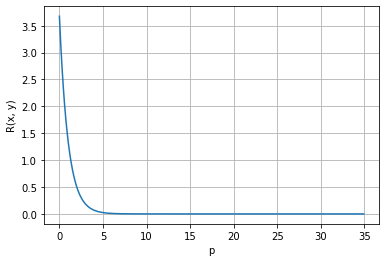

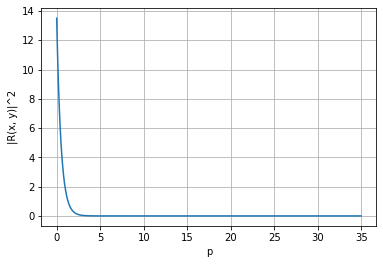

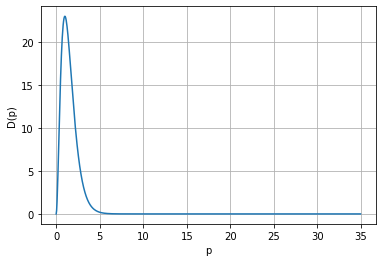

n=2, l=0: R(n, l) = e**(-p/2)*(1.50056863512004 - 0.37514215878001*p)


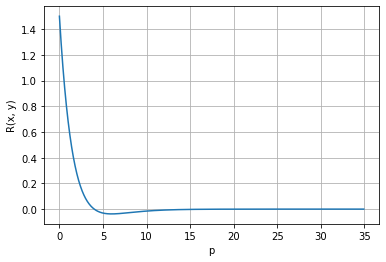

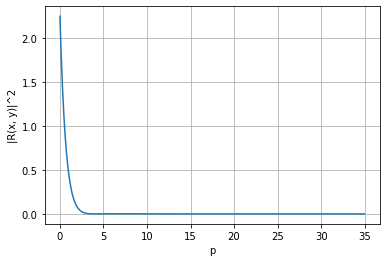

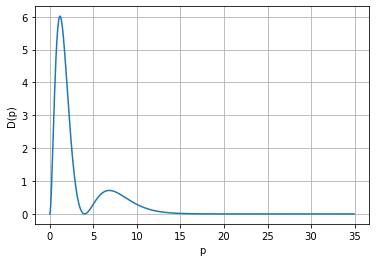

n=2, l=1: R(n, l) = 0.37514215878001*e**(-p/2)*p


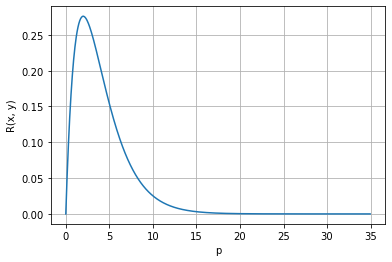

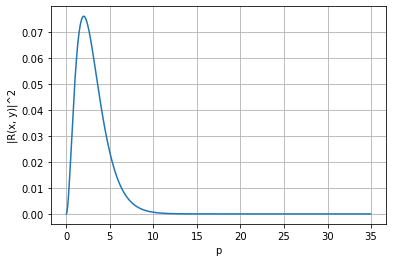

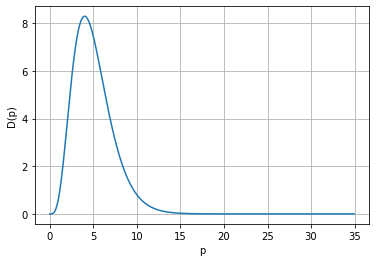

n=3, l=0: R(n, l) = e**(-p/3)*(0.00802179356874134*(p - 12)*(p - 6) - 0.144392284237344)


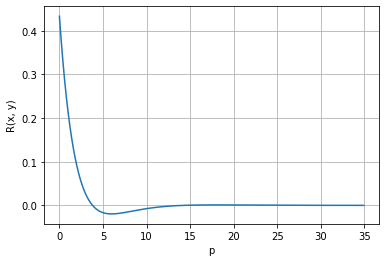

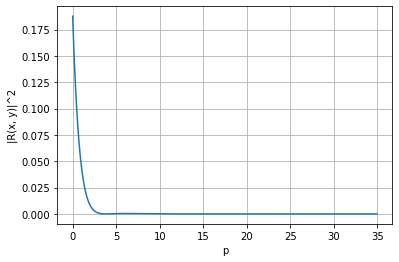

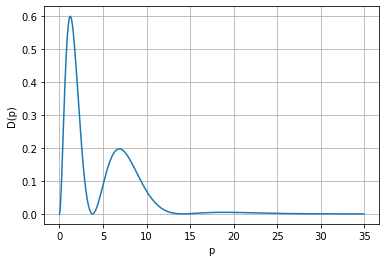

n=3, l=1: R(n, l) = -0.0226890585189425*e**(-p/3)*p*(p - 12)


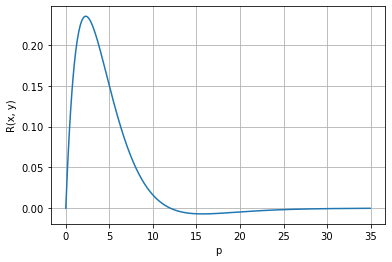

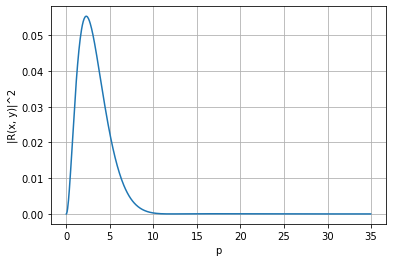

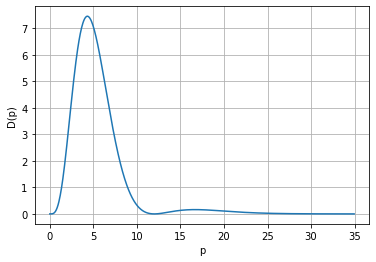

n=3, l=2: R(n, l) = 0.0226890585189425*e**(-p/3)*p**2


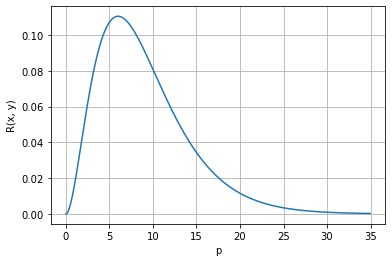

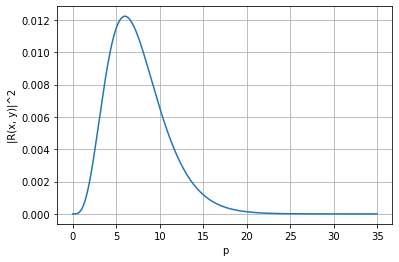

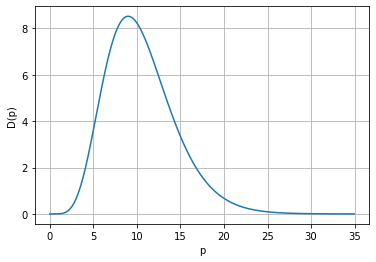

n=4, l=0: R(n, l) = e**(-p/4)*(-6.30607349572603e-5*p**3 + 0.0030269152779485*p**2 - 0.0363229833353819*p + 0.0968612888943518)


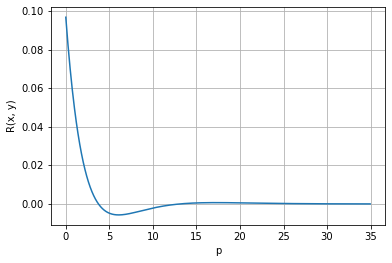

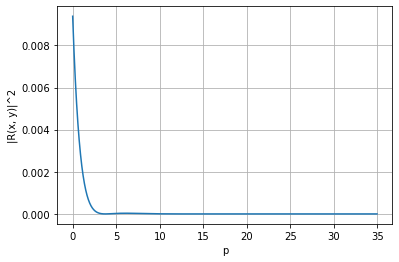

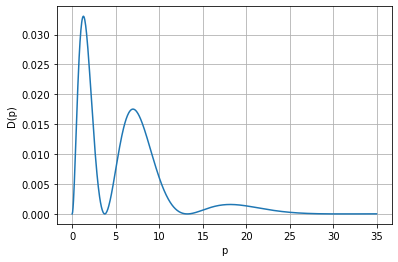

n=4, l=1: R(n, l) = 0.000327673190725829*e**(-p/4)*p*((p - 24)*(p - 16) - 64)


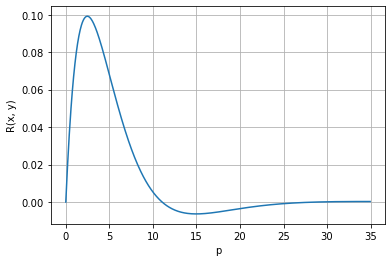

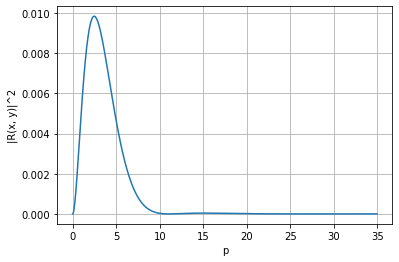

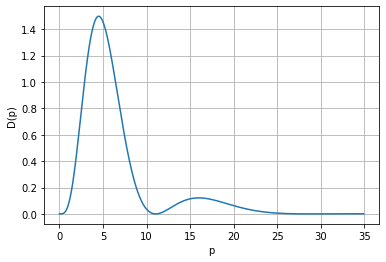

n=4, l=2: R(n, l) = e**(-p/4)*p**2*(0.0222431937768256 - 0.000926799740701067*p)


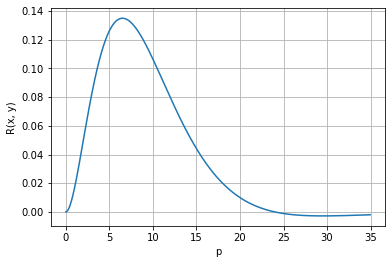

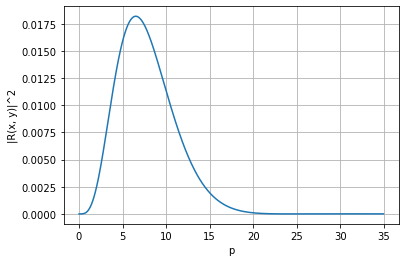

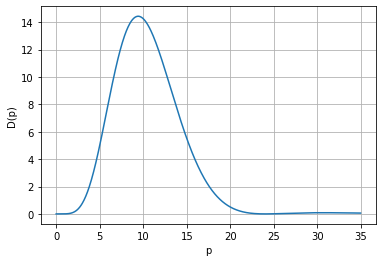

n=4, l=3: R(n, l) = 0.000926799740701067*e**(-p/4)*p**3


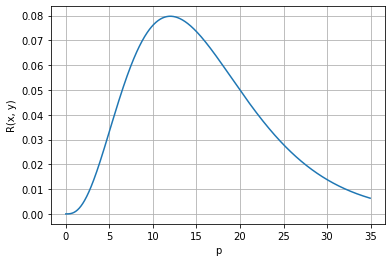

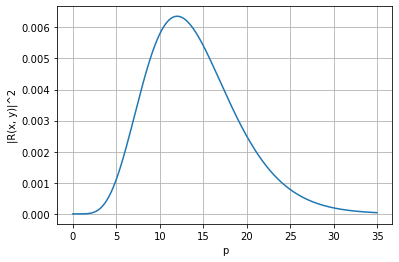

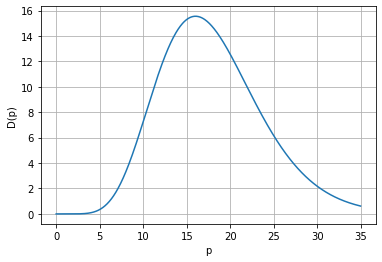

In [104]:
#1
R_ = []
for n in range(1, 5):
    RR = []
    for l in range(0, n):
        f = simplify(R(n, l))
        RR.append(f)
        print("n="+str(n)+", l="+str(l)+": R(n, l) =", f)
        
        #R(p)
        fig = plt.figure()
        plt.grid()
        X = np.arange(0, 35, 0.05)
        Y = [f.subs(p, x).subs(e, math.exp(1)) for x in X]
        plt.xlabel("p")
        plt.ylabel("R(x, y)")
        plt.plot(X, Y)
        plt.show()
        
        #|R(p)|^2
        fig = plt.figure()
        plt.grid()
        X = np.arange(0, 35, 0.05)
        Y = [abs(f.subs(p, x).subs(e, math.exp(1)))**2 for x in X]
        plt.xlabel("p")
        plt.ylabel("|R(x, y)|^2")
        plt.plot(X, Y)
        plt.show()
        
        #D(p)
        fig = plt.figure()
        plt.grid()
        X = np.arange(0, 35, 0.05)
        Y = [4*math.pi*x**2*abs(f.subs(p, x).subs(e, math.exp(1)))**2 for x in X]
        plt.xlabel("p")
        plt.ylabel("D(p)")
        plt.plot(X, Y)
        plt.show()
        R_.append(RR)

In [109]:
E = []
for n in range(1, 5):
    En = -13.5*(Z**2)/(n**2)
    E.append(En)
    print("E"+str(n)+"="+str(En))
print()
for k in range(0, len(E)):
    for i in range(k+1, len(E)):
        print("i="+str(i+1),"k="+str(k+1),"W[ik]="+str((E[i]-E[k])/h_))

E1=-13.5
E2=-3.375
E3=-1.5
E4=-0.84375

i=2 k=1 W[ik]=9.642857142857142e+34
i=3 k=1 W[ik]=1.1428571428571429e+35
i=4 k=1 W[ik]=1.2053571428571428e+35
i=3 k=2 W[ik]=1.7857142857142856e+34
i=4 k=2 W[ik]=2.4107142857142856e+34
i=4 k=3 W[ik]=6.25e+33


l = 3, m = -3, Y(l,m) = 0.417223823632784*e**(-3.0*I*φ)*(1 - cos(θ)**2)**1.5


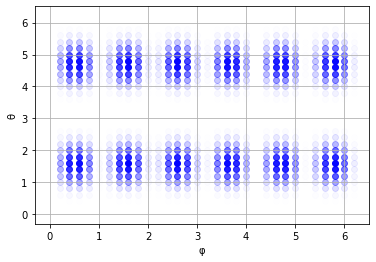

In [170]:
#2
l = 3
m = -3
f_e = Y_e(l,m)
print("l =", str(l)+", m =", str(m)+", Y(l,m) =",f_e)

PHI = []
TETA = []
YY_real = []
YY_im = []
for pp in np.arange(0, 2*math.pi, 0.2):
    for t in np.arange(0, 2*math.pi, 0.2):
        PHI.append(pp)
        TETA.append(t)
        g = f_e.subs(cos, math.cos(t)).subs(e, math.exp(1)).subs(phi, pp)
        YY_real.append(float(im(g)))
        #YY_im.append(float(im(g)))

fig = plt.figure()
MAX = max(max(YY_real),abs(min(YY_real)))
for i in range(0, len(PHI)):
    plt.scatter([PHI[i]],[TETA[i]],c="blue",alpha=abs(YY_real[i]/MAX)**2)
plt.xlabel("φ")
plt.ylabel("θ")
plt.grid()
plt.show()

V(5, 4, 0) = e**(-0.378071833648393*r)*r**4*(0.00131074106969815*cos(θ)**4 - 0.00112349234545556*cos(θ)**2 + 0.000112349234545556)
Максимум вероятности на r = 4.5


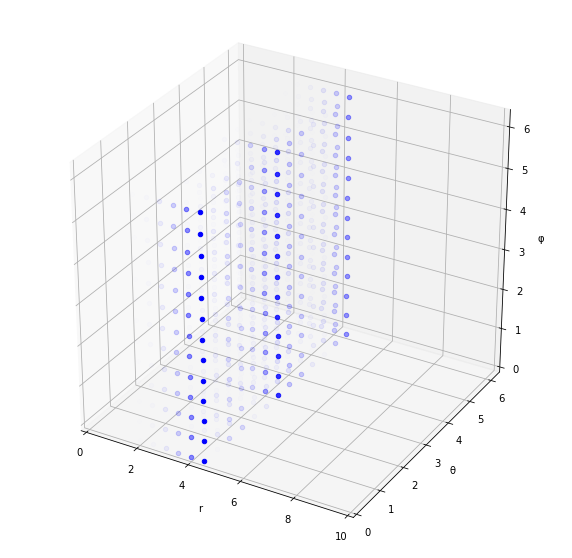

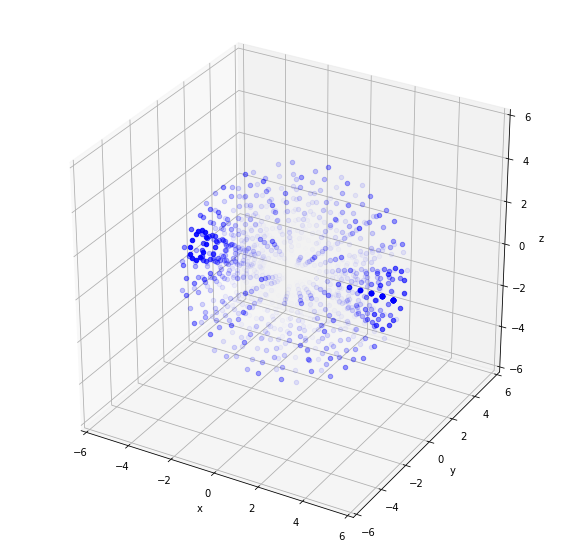

In [164]:
#3
n = 4
l = 3
m = 0
vf = Vf(n, l, m)
print("V("+str(n)+", "+str(l)+", "+str(m)+") =", vf)
RR = []
Rd = []
TT = []
Td = []
PP = []
Pd = []
res = []
for r in np.arange(0, 5, 0.5):
    for t in np.arange(0, 2*math.pi, 0.5):
        for ph in np.arange(0, 2*math.pi, 0.5):
            RR.append(r)
            TT.append(t)
            PP.append(ph)
            Pd.append(r*math.sin(t)*math.cos(ph))
            Td.append(r*math.sin(t)*math.sin(ph))
            Rd.append(r*math.cos(t))
            vf2 = vf.subs(r_, r).subs(phi, ph).subs(cos, math.cos(t)).subs(e, math.exp(1))
            vf2 = re(vf2)
            res.append((abs(float(vf2))**2)*4*math.pi*r**2)

#сферические
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
MAX = max(res)
i1 = res.index(MAX)
print("Максимум вероятности на r =",Rd[i1])
for i in range(0, len(RR)):
    ax.scatter([RR[i]],[TT[i]],[PP[i]],c="blue",alpha=(res[i]/MAX))
plt.xlabel("r")
plt.ylabel("θ")
ax.set_zlabel("φ")
ax.set_zlim(0,2*math.pi)
ax.set_xlim(0,10)
ax.set_ylim(0,2*math.pi)
plt.show()

#декартовы
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
MAX = max(res)
for i in range(0, len(RR)):
    ax.scatter([Rd[i]],[Td[i]],[Pd[i]],c="blue",alpha=math.sqrt(abs(res[i]/MAX)))
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("z")
ax.set_zlim(-6,6)
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
plt.show()

In [76]:
print(R(5,4), Y_e(0, 0))

2.77233185735701e-5*e**(-p/5)*p**4 0.282094791773878
